# **DEEP LEARNING AVEC TENSORFLOW ET L'API FONCTIONNELLE KERAS**

## Installer

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np

## Exemple simple

un modèle fonctionnel simple à deux couches

In [3]:
# Déclarer une entrée (l'échantillon a la forme 3,1)
inputs = keras.Input(shape=(3,), name = "my_input")

# Créer une couche et l'appeler en entrée
features = layers.Dense(64, activation="relu")(inputs)

# Créer la couche de sortie finale et l'appeler sur les caractéristiques
outputs = layers.Dense(10, activation="softmax")(features)

# Spécifier les entrées et les sorties dans le constructeur du modèle
model = keras.Model(inputs = inputs, outputs = outputs)


In [8]:
# Regardons les objets
print(inputs.shape)
print(inputs.dtype)
print(features.shape)

(None, 3)
<dtype: 'float32'>
(None, 64)


In [9]:
# Resumé du modèle
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


# Multi-entrées, multi-sorties

** Notre modèle comporte trois entrées :

Le titre du ticket (saisie de texte)

Le corps du texte du ticket (saisie de texte)

Toutes les balises ajoutées par l'utilisateur (entrée catégorique, supposée ici être encodée à chaud)

** Notre modèle a également deux sorties :

- Le score de priorité du ticket, un scalaire entre 0 et 1 (sortie sigmoïde)
- Le département qui doit gérer le ticket (un softmax sur l'ensemble des départements)

In [21]:
# definition des variables
vocabulary_size = 10000
num_tags = 100
num_departements = 4

# definition des entrées
title = keras.Input(shape=(vocabulary_size,), name='title')
text_body = keras.Input(shape=(vocabulary_size,), name = "text_body")
tags = keras.Input(shape=(num_tags,), name = "tags")

# les caractéristiques
features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation = "relu")(features)

# definition des sorties

priority = layers.Dense(1, activation = "sigmoid", name = "priority")(features)
departement = layers.Dense(num_departements, activation="softmax", name ="departement")(features)

# creation du modele

model = keras.Model(inputs = [title, text_body, tags], outputs = [priority, departement])

## Entrainement

Option 1 : Fournir des listes de tableaux d'entrée et de cible

Tout d'abord, nous créons des données d'entrée aléatoires avec des valeurs comprises entre 0 et 2 ainsi que des données aléatoires pour nos étiquettes. Nous utiliserons ces données pour entraîner notre modèle :

In [22]:
num_samples = 100

title_data = np.random.randint(0, 2, size = (num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size = (num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size = (num_samples, num_tags))

# creation de labels aleatoires

priority_data = np.random.random(size = (num_samples, 1))
departement_data = np.random.randint(0, 2, size = (num_samples, num_departements))

# compile modele

model.compile(optimizer = "rmsprop",
              loss = ["mean_squared_error", "categorical_crossentropy"],
              metrics = [["mean_absolute_error"], ["accuracy"]])

# entrainement du modele

model.fit([title_data, text_body_data, tags_data],
          [priority_data, departement_data],
          epochs=50)

# evaluation du modele

model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, departement_data])

# faire des previsions

priority_pred, departement_pred = model.predict([title_data, text_body_data, tags_data])



Epoch 1/50
4/4 [==============================] - 1s 12ms/step - loss: 38.8057 - priority_loss: 0.2640 - departement_loss: 38.5416 - priority_mean_absolute_error: 0.4167 - departement_accuracy: 0.1300
Epoch 2/50
4/4 [==============================] - 0s 11ms/step - loss: 72.1281 - priority_loss: 0.3162 - departement_loss: 71.8119 - priority_mean_absolute_error: 0.4641 - departement_accuracy: 0.1900
Epoch 3/50
4/4 [==============================] - 0s 10ms/step - loss: 30.1472 - priority_loss: 0.3162 - departement_loss: 29.8310 - priority_mean_absolute_error: 0.4641 - departement_accuracy: 0.2200
Epoch 4/50
4/4 [==============================] - 0s 10ms/step - loss: 29.7039 - priority_loss: 0.3162 - departement_loss: 29.3877 - priority_mean_absolute_error: 0.4641 - departement_accuracy: 0.1500
Epoch 5/50
4/4 [==============================] - 0s 10ms/step - loss: 26.4053 - priority_loss: 0.3162 - departement_loss: 26.0891 - priority_mean_absolute_error: 0.4641 - departement_accuracy: 0.

Option 2 : Fournir des dicts de tableaux d'entrée et de cible

In [19]:
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "departement": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "departement": ["accuracy"]})

model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "departement": departement_data},
          epochs=50)

model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "departement": departement_data})

priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

Epoch 1/50
4/4 [==============================] - 1s 10ms/step - loss: 143.7820 - priority_loss: 0.3065 - departement_loss: 143.4756 - priority_mean_absolute_error: 0.4835 - departement_accuracy: 0.3000
Epoch 2/50
4/4 [==============================] - 0s 10ms/step - loss: 115.8050 - priority_loss: 0.3065 - departement_loss: 115.4985 - priority_mean_absolute_error: 0.4835 - departement_accuracy: 0.3200
Epoch 3/50
4/4 [==============================] - 0s 11ms/step - loss: 81.0052 - priority_loss: 0.3065 - departement_loss: 80.6987 - priority_mean_absolute_error: 0.4835 - departement_accuracy: 0.3200
Epoch 4/50
4/4 [==============================] - 0s 10ms/step - loss: 69.9624 - priority_loss: 0.3065 - departement_loss: 69.6560 - priority_mean_absolute_error: 0.4835 - departement_accuracy: 0.2600
Epoch 5/50
4/4 [==============================] - 0s 10ms/step - loss: 55.0677 - priority_loss: 0.3065 - departement_loss: 54.7613 - priority_mean_absolute_error: 0.4835 - departement_accuracy

## Acceder aux calques

- visualiser le modele

- extraction des caracteristiques

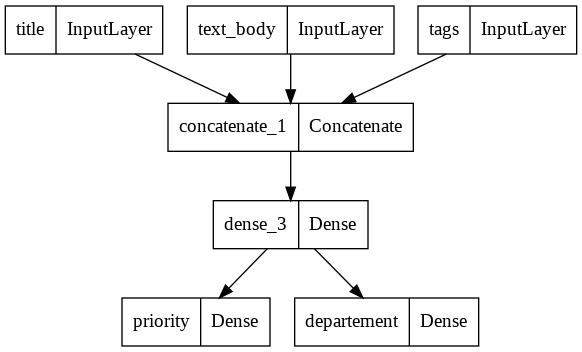

In [23]:
keras.utils.plot_model(model, "ticket_classifier.png")

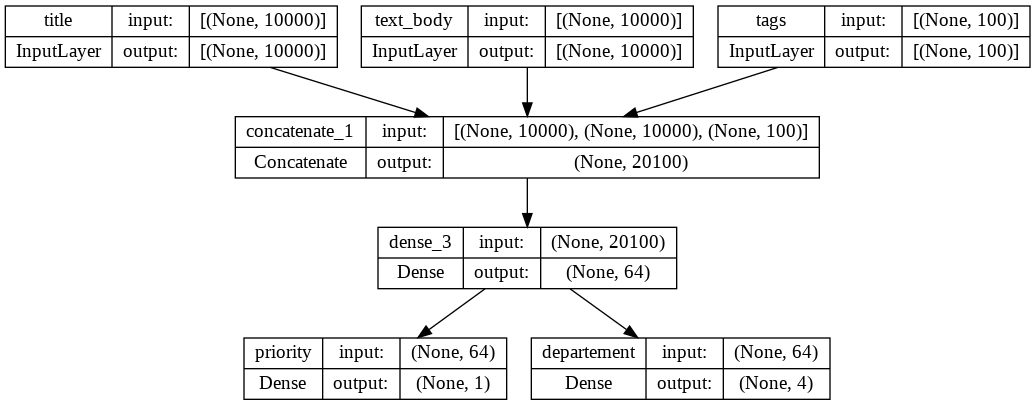

In [24]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png",  show_shapes=True)

# Recuperation des entrées ou des sorties

In [25]:
model.layers

In [27]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [28]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate_1')>